# Mask RCNN Inference test

Test Inference on Pretrained Model

Benedictus Aryo

### Import Library

In [6]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR) # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/')) # To find local version
import coco

%matplotlib inline

### Set Model Directory

In [9]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('../', 'mask_rcnn_coco.h5')

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

### Set Inference Config

In [10]:
# Create Inference Config class inherit from Coco.Config
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference
    # one image at a time, Batch size = GPU_COUNT * IMAGES_PER_GPU
    # All other settings such as Backbone remain default
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

### Loading Weights


In [12]:
# Create model object in inference mode
model = modellib.MaskRCNN(mode='inference', 
                          model_dir='../mask_rcnn_coco.h5',
                          config=config)

# Load weights trained on MS-COCO
model.load_weights('../mask_rcnn_coco.h5', by_name=True)

### Define Classes of the COCO dataset

In [13]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

### Load Image

In [21]:
!ls ../images

1045023827_4ec3e8ba5c_z.jpg  5951960966_d4e1cda5d0_z.jpg
12283150_12d37e6389_z.jpg    6584515005_fce9cec486_z.jpg
2383514521_1fc8d7b0de_z.jpg  6821351586_59aa0dc110_z.jpg
2502287818_41e4b0c4fb_z.jpg  7581246086_cf7bbb7255_z.jpg
2516944023_d00345997d_z.jpg  7933423348_c30bd9bd4e_z.jpg
25691390_f9944f61b5_z.jpg    8053677163_d4c8f416be_z.jpg
262985539_1709e54576_z.jpg   8239308689_efa6c11b08_z.jpg
3132016470_c27baa00e8_z.jpg  8433365521_9252889f9a_z.jpg
3627527276_6fe8cd9bfe_z.jpg  8512296263_5fc5458e20_z.jpg
3651581213_f81963d1dd_z.jpg  8699757338_c3941051b6_z.jpg
3800883468_12af3c0b50_z.jpg  8734543718_37f6b8bd45_z.jpg
3862500489_6fd195d183_z.jpg  8829708882_48f263491e_z.jpg
3878153025_8fde829928_z.jpg  9118579087_f9ffa19e63_z.jpg
4410436637_7b0ca36ee7_z.jpg  9247489789_132c0d534a_z.jpg
4782628554_668bc31826_z.jpg


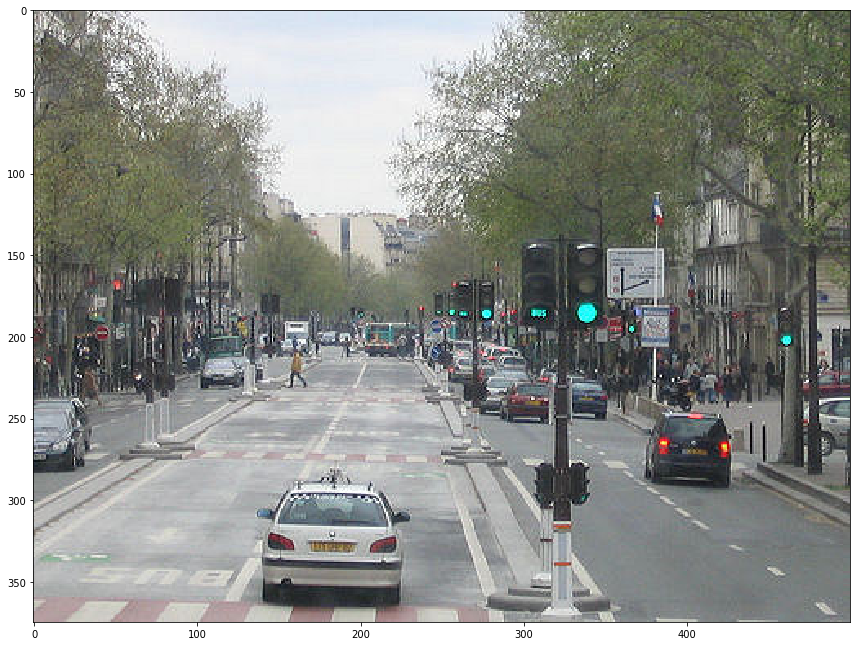

In [18]:
# Load a random image from the images folder
image = skimage.io.imread(IMAGE_DIR+'/12283150_12d37e6389_z.jpg')

# Original Image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

### Making Predictions

Processing 1 images
image                    shape: (375, 500, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


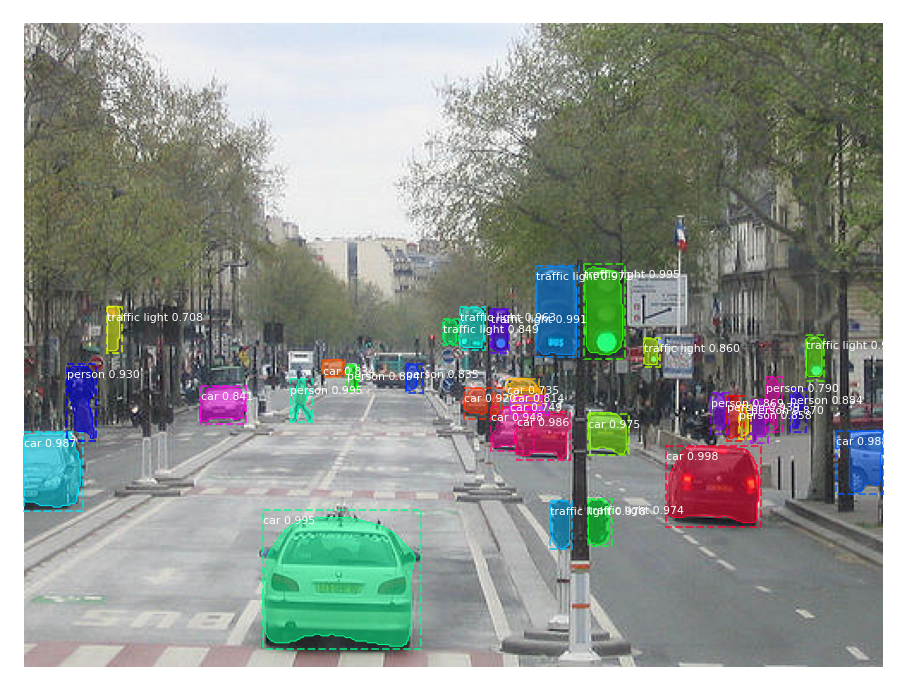

<Figure size 432x288 with 0 Axes>

In [30]:
# Run Detection
results = model.detect([image], verbose=1)

# VIsualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], 
                            r['class_ids'], class_names, 
                            r['scores'])
plt.savefig('tes_infer.png')

## To do
Create save image method
https://stackoverflow.com/questions/56269033/how-can-i-save-my-result-of-image-using-mask-rcnn